In [98]:
%%time
#exercise 1 from section 1.3 method 1
def factorial(n):
    retval = n
    while (n-1) > 1:
        retval *= (n-1)
        n -= 1
    return retval

print factorial(5)


120
CPU times: user 67 µs, sys: 2 µs, total: 69 µs
Wall time: 64.8 µs


In [5]:
%%time
#exercise 1 from section 1.3 method 2
def factorial(n):
    y = reduce(lambda x, y: x*y, range(2,n),n)
    return y

def factrec(n):
    """
    Compute Factorial using recursion
    """
    if n < 2:
        return n;
    else:
        return n*factrec(n-1)
    
#print factrec(12)
print factorial(12)

479001600
CPU times: user 97 µs, sys: 0 ns, total: 97 µs
Wall time: 92 µs


In [90]:
%%time
#playing around with reduce
#exercise 5 can be done using this but need python 3.3 and need to use itertools.accumulate function
def testreduce(n):
    y = reduce(lambda y, x: (y**2+1), range(n),1)
    return y

print testreduce(3)

26
CPU times: user 83 µs, sys: 4 µs, total: 87 µs
Wall time: 83.9 µs


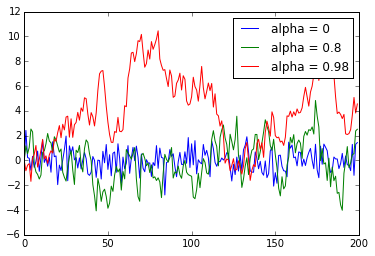

CPU times: user 183 ms, sys: 4.89 ms, total: 188 ms
Wall time: 188 ms


In [106]:
%%time
%matplotlib inline
#exercises 5 & 6 in seciton 1.3
from random import normalvariate as epsilon
from matplotlib import pyplot as plt

T = 200
alphas = (0,0.8,0.98)
lbl = ['alpha = ' + str(a) for a in alphas]
x = [[0] for i in alphas]

for i in range(1,T):
    for j,alpha in enumerate(alphas):
        x[j].append(alpha * x[j][i-1] + epsilon(0,1))

for i,v in enumerate(alphas):
    plt.plot(x[i],'-',label=lbl[i])

plt.legend()
plt.show()

In [100]:
#playing around with matrices etc, scratch pad for above
T = 10
alpha = (0,0.8,0.98)
x = [[999] for i in alpha]
#for i,v in enumerate(alpha):
#    x.append([99])
    
for i in range(1,T):
    for j,a in enumerate(alpha):
        x[j].append(i)
        
print x


[[999, 1, 2, 3, 4, 5, 6, 7, 8, 9], [999, 1, 2, 3, 4, 5, 6, 7, 8, 9], [999, 1, 2, 3, 4, 5, 6, 7, 8, 9]]


CPU times: user 68.6 ms, sys: 1.02 ms, total: 69.6 ms
Wall time: 67.6 ms


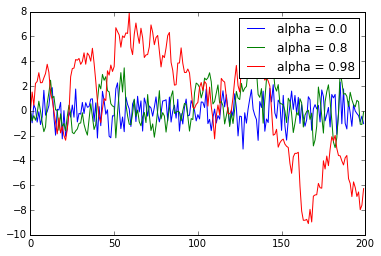

In [109]:
%%time
%matplotlib inline
#Exercise 6 from the solution book -- beats me by 2x in performance .. hah
from random import normalvariate as epsilon
from matplotlib import pyplot as plt

alphas = [0.0, 0.8, 0.98]
ts_length = 200

for alpha in alphas:
    x_values = []
    current_x = 0
    for i in range(ts_length):
        x_values.append(current_x)
        current_x = alpha * current_x + normalvariate(0, 1)
    plt.plot(x_values, label='alpha = ' + str(alpha))
plt.legend()


In [134]:
%%time
#exercise 3 from section 1.3
#Monte Carlo for PI calculation using uniform distribution around unit circle -- my method
#I do beat the solution in performance by 20% but my method is memory intensive and is not scalable
from __future__ import division
from random import uniform
from math import sqrt

N = 1000000

dist_from_origin = [sqrt(uniform(-0.5,0.5)**2 + uniform(-0.5,0.5)**2) for x in range(N)]
in_unit_circle = [x < 0.5 for x in dist_from_origin]
print 4*sum(in_unit_circle) / N

3.1424
CPU times: user 1.37 s, sys: 12.2 ms, total: 1.38 s
Wall time: 1.37 s


In [133]:
%%time
#exercise 3 from section 1.3 from solution book

from __future__ import division  # Omit if using Python 3.x
from random import uniform
from math import sqrt

n = 1000000

count = 0
for i in range(n):
    u, v = uniform(0, 1), uniform(0, 1)
    d = sqrt((u - 0.5)**2 + (v - 0.5)**2)
    if d < 0.5:
        count += 1

area_estimate = count / n

print(area_estimate * 4)  # dividing by radius**2

3.144432
CPU times: user 1.71 s, sys: 21.4 ms, total: 1.74 s
Wall time: 1.71 s


In [1]:
%%time
#exercise1 from section 1.4
#part 1
def inner_prod(x,y):
    ret = [a*b for a,b in zip(x,y)]
    return ret

#part 2
def num_evens(seq):
    return sum([x%2 == 0 for x in seq])

#part 3
def num_even_pairs(tpls):
    return sum([all([elem%2==0 for elem in tpl]) for tpl in tpls])

#test -- others work too tested on command line
xs,ys=(2,4,9,12),(5,2,9,10)
print inner_prod(xs,ys)

[10, 8, 81, 120]
CPU times: user 146 µs, sys: 0 ns, total: 146 µs
Wall time: 140 µs


In [11]:
%%time
#exercise 2 frp, section 1.4
#p(x) = a0 + a1 x + a2 x^2 + a3 x^3 + ... + an x^n = {i=0}SIGMA{n} (ai x^i)

def polynom(x,coeffs):
    """
    computes polynomial function
    x is value
    coeffs is a list
    """
    ret = 0
    for index,coeff in enumerate(coeffs):
        ret += coeff * x**index
    return ret

def polynomred(x,coeffs):
    print "Not sure if we can use reduce here"
    return

print polynomred(2,[1,0.5,0.25,0.125,0.0625])

Not sure if we can use reduce here
None
CPU times: user 92 µs, sys: 0 ns, total: 92 µs
Wall time: 86.1 µs


3.14033761653


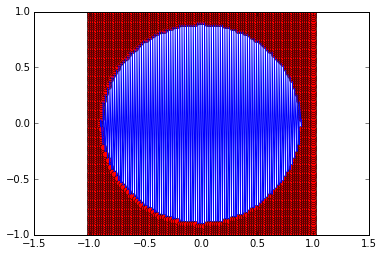

CPU times: user 232 ms, sys: 15 ms, total: 247 ms
Wall time: 241 ms


In [19]:
%%time
from __future__ import division
#playing around to compute PI by all values, not just random values
#should yield closer and consistent PI value more points the better but CPU/mem intensive
%matplotlib inline
import numpy
import math
from matplotlib import pyplot as plt

numpts_total = 0
numpts_in_circle = 0
xf = []
yf = []
xc = []
yc = []

edge = 100
samples = numpy.linspace(-1,1,edge)
c = numpy.mean(samples)
for x in samples:
    for y in samples:
        numpts_total += 1
        if math.sqrt((x)**2 + (y)**2) <= 0.9:
            numpts_in_circle += 1
            xc.append(x)
            yc.append(y)
        else:
            xf.append(x)
            yf.append(y)
numpts_total -= 2*edge
print 4*(1/0.81)*numpts_in_circle / numpts_total

plt.plot(xf,yf,'ro')
plt.plot(xc,yc,'b-')
plt.axis('equal')
plt.show()

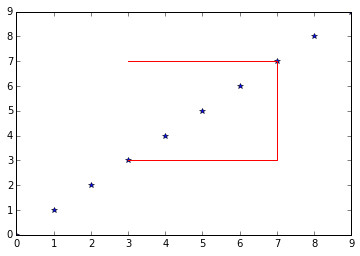

In [28]:
%matplotlib inline
#scratch pad
from matplotlib import pyplot as plt
xf=range(10)
yf=range(10)
xr=[3,7,7,3]
yr=[3,3,7,7]
plt.plot(xf,yf,'b*')
plt.plot(xr,yr,'r-')
plt.show()

In [42]:
%%time
from __future__ import division
#playing around to compute PI by all values, not just random values
#should yield closer and consistent PI value more points the better but CPU/mem intensive
import numpy
import math

numpts_total = 0
numpts_in_circle = 0

edge = 25000
r = 0.9
samples = numpy.linspace(-1,1,edge)
in_unit_circle = sum([sum([math.sqrt(x**2 + y**2) < r for x in samples]) for y in samples])
print (4/0.81)*in_unit_circle / ((edge-2)*edge)
#print 4*(1/0.81)*sum(map(sum,in_unit_circle)) / ((edge - 2)*edge)

#for x in samples:
#    for y in samples:
#        numpts_total += 1
#        if math.sqrt((x)**2 + (y)**2) <= r:
#            numpts_in_circle += 1

#numpts_total -= 2*edge
#print 4*(1/0.81)*numpts_in_circle / numpts_total


3.14159493253
CPU times: user 8min 24s, sys: 1.17 s, total: 8min 25s
Wall time: 8min 24s


In [60]:
s=range(5)
n=[[x+y >= 5 for x in s] for y in s]
print sum(map(sum,n))

10


In [43]:
from __future__ import division
1000000*825/3600000

229.16666666666666

In [49]:
%%time
from random import uniform
N=1000000
print sum([uniform(0,1) > 0.5 for x in range(N)])

499250
CPU times: user 637 ms, sys: 9.02 ms, total: 646 ms
Wall time: 643 ms


In [50]:
%%time
from __future__ import division
from random import uniform

def ecdf(n,t):
    """
        DESCRIPTION:
            Implements "Empirical Cumulative distribution Function (ECDF)"
            ECDF = {i=0}SIGMA{i=n-1}[1 if x{i} < t; 0 otherwise]
            As n approaches inf, ECDF converges to t
        
        SYNTAX:
            y = ecdf(n,p)
        
        ARGUMENTS:
            n: number of events to be considered (int)
            t: probability interval (float)
            
        RETURNS:
            y: the ecdf value (float)
    """
    ecdfdistr = [uniform(0,1) < t for x in range(n)]
    return sum(ecdfdistr)/n

ecdf?
print ecdf(10000,0.95)


0.9506
CPU times: user 10 ms, sys: 3.05 ms, total: 13.1 ms
Wall time: 10.9 ms


In [6]:
print "test"

test
